<a href="https://colab.research.google.com/github/sgauthamr2001/cvi-session-1/blob/master/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning Github repo 

---



In [ ]:
!git clone https://github.com/sgauthamr2001/cvi-session-1.git

Importing the necessary modules required for the task

---



In [ ]:
import cv2                         #Open-CV
import matplotlib.pyplot as plt    #PyPlot
import numpy as np                 #Numpy 

Changing the directory to the one with images 

---



In [ ]:
%cd '/content/cvi-session-1/Thresholding/src'
!ls

Reading an Image & Image Histogram


---



We use the function cv2.imread() to read an image. The image should be in the working directory or the full path of image should be given.

cv2.imread(src, flag)

Arguments  :

    src – input image.
    flag – specifies the way image should be read.
        cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
        cv2.IMREAD_GRAYSCALE or 0 : Loads image in grayscale mode.

Note:
 

1.   Even if the image path is wrong, it won’t throw any error, but nothing gets stored in the image variable.
2.   Google colab crashes if you try to display image using cv2.imshow(), which is used to display images, instead plt.imshow() is used. 





In [ ]:
deer_gray = #Fill in your code
print(deer_gray)
print(deer_gray.shape) 
plt.imshow(deer_gray,'gray')

The following piece of code plots the image histogram. 

plt.hist() is used for the same.  


In [ ]:
plt.hist(deer_gray.ravel(),256,[0,255])
plt.show()

cv2.threshold()

---
It is used for image thresholding using OpenCV


Arguments  :
 
    1 – Source image
    2 – The threshold value which is used to classify the pixel values
    3 - maxVal which represents the value to be given if pixel value is more than the threshold value
    4 - Style of Thresholding

Output :

    thresh – Thresholded image
    ret    - Threshold parameter (Only in this case) 

In [ ]:
image_gray     =  cv2.imread('apple.jpg',0)
_,image_th     =  cv2.threshold(image_gray,225,255,cv2.THRESH_BINARY)
_,image_th_inv =  #Fill in your code 

image_list  =  [image_gray,image_th,image_th_inv]
title       =  ['Original Image','BINARY','BINARY_INV']
for i in range(3) :
  plt.title(title[i])
  plt.imshow(image_list[i],'gray')
  plt.show()

image_hist = plt.hist(image_gray.ravel(),256,[0,255])
plt.title('Image Histogram')
plt.show()

p-Tile Thresholding 


---


For p-tile thresholding, there isn't inbuilt function in OpenCV, so the following code based on the afore mentioned algorithm does the work.  

In [ ]:
tile_gray  =  cv2.imread('cells.jpg',0)
tile_hist  =  plt.hist(tile_gray.ravel(),256,[0,255])
plt.title('Image Histogram')
plt.show()

for n in range(0,255):
  #Fill in your code 
  
_,tile_th= cv2.threshold(tile_gray,T,255,cv2.THRESH_BINARY)
plt.imshow(tile_gray,'gray')
plt.title('Gray-Scale Image')
plt.show()
plt.imshow(tile_th,'gray')
plt.title('Thresholded Image')
plt.show()
print('The threshold value is %d' % T)

Iterative Thresholding

---


Further there is no function in OpenCV for Iterative Global Thresholding as well, the code for the algorithm mentioned previously is a follows : 

In [ ]:
iter_gray = cv2.imread('ball.jpg',0)
iter_hist = plt.hist(iter_gray.ravel(),256,[0,255])
plt.title('Image Histrogram')
plt.show() 

n = np.arange(256)
iter_hist_n = iter_hist[0]*n
T = np.sum(iter_hist_n)/np.sum(iter_hist[0])
print('The mean intensity of the pixels is %.2f' % T)

delta = 10
while delta > 0.5 :
  M1    = np.sum(iter_hist_n[:int(T)-1])/np.sum(iter_hist[0][:int(T)-1])
  M2    = #Fill in your code 
  delta = abs(T-0.5*(M1+M2))
  T     = int((M1 + M2)/2)
_,iter_th = cv2.threshold(iter_gray,T,255,cv2.THRESH_BINARY)

plt.imshow(iter_gray,'gray')
plt.title('Gray-Scale Image')
plt.show()
plt.imshow(iter_th,'gray')
plt.title('Thresholded Image')
plt.show()
print('The threshold value is %d' % T)


Otsu's Binarization

---


For Otsu's Binarisation, cv2.threshold() function is used, but an extra flag, 
cv2.THRESH_OTSU is passed. For threshold value, zero is passed unlike the previous cases. The algorithm finds the optimal threshold value and returns as output. If Otsu's thresholding is not used, returned value is same as the threshold value given by the user. 

In [ ]:
otsu_gray = cv2.imread('cells_otsu.jpg',0)
otsu_hist = plt.hist(otsu_gray.ravel(),256,[0,255])
plt.title('Image Histogram')
plt.show()
T,otsu_th = cv2.threshold(otsu_gray,0,255,cv2.THRESH_OTSU)
plt.imshow(otsu_gray,'gray')
plt.title('Gray-Scale Image')
plt.show()
plt.imshow(otsu_th,'gray')
plt.title('Thresholded Image')
plt.show()
print('The threshold value using Otsu method is %d' % T)



Adaptive Thresholding 

---
cv2.adaptiveThreshold()

The function has 6 input params and 1 output params.

Arguments  :
 
    1 – Source image
    2 - maxVal which represents the value to be given if pixel value is more than the threshold value
    3 - Style of Thresholding - 
        cv2.ADAPTIVE_THRESH_MEAN_C : Threshold value is the mean of neighbourhood area. 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
    4 - Thresholding Type - cv2.THRESH_BINARY
    5 - Block size N
    6 - Constant C
Output :

    Thresholded image


In [ ]:
adaptive_gray = cv2.imread('sudoku.jpg',0)
adaptive_hist = plt.hist(adaptive_gray.ravel(),256,[0,255])
plt.title('Image Histogram')
plt.show()
T,otsu_th = cv2.threshold(adaptive_gray,0,255,cv2.THRESH_OTSU)
adap_m_th = cv2.adaptiveThreshold(adaptive_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
adap_g_th = #Fill in your code 

image_list  =  [adaptive_gray,otsu_th,adap_m_th,adap_g_th]
title       =  ['Original Image','Otsu Binarisation','Adaptive Mean','Adaptive Gaussian']
for i in range(4) :
  plt.title(title[i])
  plt.imshow(image_list[i],'gray')
  plt.show()

Take-home Tasks :

---

1.   Consider the following image 'shapes.jpg' , perform otsu's binarisation, as well as adaptive thresholding, and try analysing the difference between the thresholded images in both the cases. 
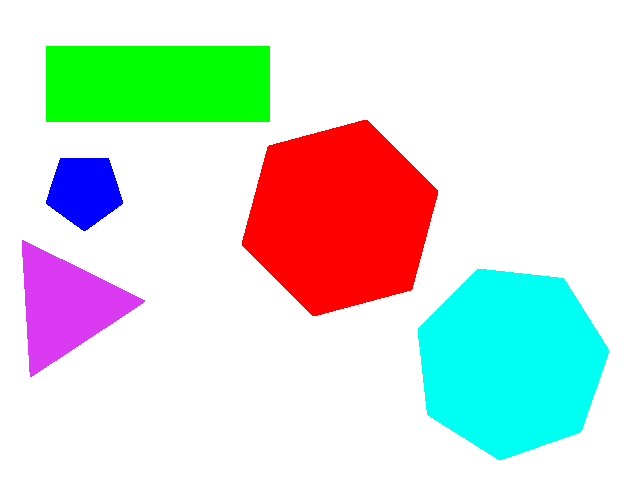
2. Try splitting the sudoku image into sub-images as done in slides and perform the global thresholding on these sub-parts. 


